In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [33]:
datatrain = pd.read_csv(
    "mushroomGroup.data",
    names=[
        'class','cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing',
        'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat'])
datatrain.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [34]:
datatrain.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [35]:
datatrain.drop(datatrain.columns[16], axis=1, inplace=True)

In [36]:
for col in datatrain.columns:
    if len(datatrain[col].value_counts()) == 2:
        le = LabelEncoder()
        le.fit(datatrain[col])
        datatrain[col] = le.transform(datatrain[col])
datatrain.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,x,s,n,1,p,1,0,1,k,...,s,s,w,w,w,o,p,k,s,u
1,0,x,s,y,1,a,1,0,0,k,...,s,s,w,w,w,o,p,n,n,g
2,0,b,s,w,1,l,1,0,0,n,...,s,s,w,w,w,o,p,n,n,m
3,1,x,y,w,1,p,1,0,1,n,...,s,s,w,w,w,o,p,k,s,u
4,0,x,s,g,0,n,1,1,0,k,...,s,s,w,w,w,o,e,n,a,g


In [37]:
datatrain = pd.get_dummies(datatrain)
datatrain.head()

,class,bruises,gill-attachment,gill-spacing,gill-size,stalk-shape,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,1,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,1,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,0,1,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [38]:
y = datatrain['class'].to_frame()
x = datatrain.drop('class', axis=1)

In [39]:
y.head()

,class
0,1
1,0
2,0
3,1
4,0


In [40]:
x.head()

,bruises,gill-attachment,gill-spacing,gill-size,stalk-shape,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,1,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,1,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [83]:
scaler =  StandardScaler()
X_scaled = scaler.fit_transform(x)

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, stratify=y, random_state=25)

In [85]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train.values.ravel())
y_pred_test = logreg.predict(X_test)
print('Test set accuracy of using Logistic Regression classifier: {:.3f}'.format(accuracy_score(y_test, y_pred_test)))

Test set accuracy of using Logistic Regression classifier: 1.000


In [80]:
scores = cross_val_score(logreg, X_train, y_train.values.ravel(), cv=StratifiedShuffleSplit(n_splits=5, test_size=0.4, random_state=25), scoring='accuracy')
print('Accuracy of Logistic Regression: {}'.format(scores.mean()))

Accuracy of Logistic Regression: 0.999824175824


In [15]:
Datafeatures = pd.DataFrame(logreg.coef_, columns=x.columns, index=['coefficients'])
Datafeatures.sort_values('coefficients', axis=1, ascending=False, inplace=True)
Datafeatures.T.head()

,coefficients
odor_p,1.311146
odor_c,1.286483
odor_f,1.236101
spore-print-color_r,1.204950
spore-print-color_h,1.110204


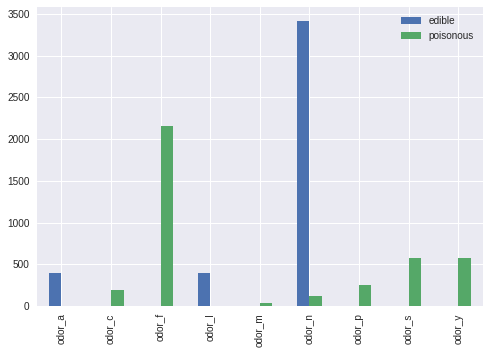

In [26]:
def plotf(feature_name):
    categories = x.columns[x.columns.str.contains(feature_name)]
    edible_num = []
    poisonous_num = []
    for category in categories:
        y[x[category]==0]
        edible_count = sum((y[x[category]==1]==0).values[:,0])
        poisonous_count = sum(x[category]==1) - edible_count
        edible_num.append(edible_count)
        poisonous_num.append(poisonous_count)
    odor_df = pd.DataFrame(index=categories, columns=['edible', 'poisonous'])
    odor_df.edible = edible_num
    odor_df.poisonous = poisonous_num
    odor_df.plot(x=odor_df.index, kind='bar')
plotf('odor')
plt.show()

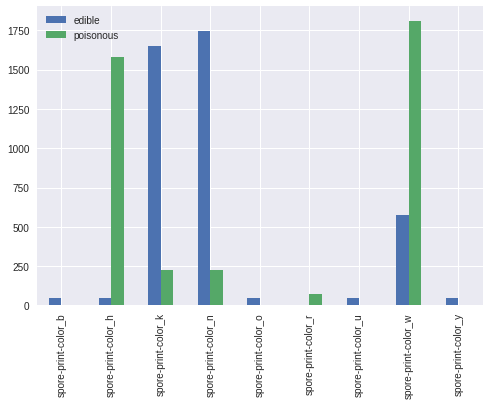

In [27]:
plotf('spore-print-color')
plt.show()

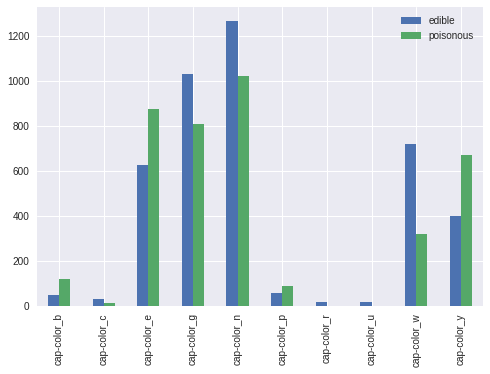

In [31]:
plotf('cap-color')
plt.show()

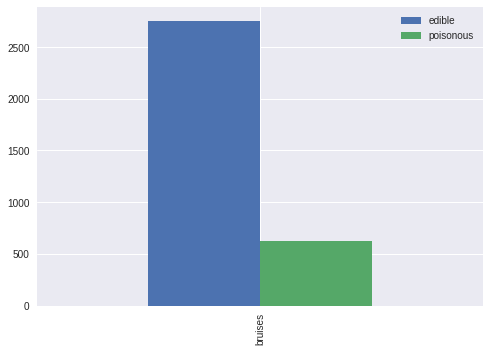

In [30]:
plotf('bruises')
plt.show()